In [1]:
%load_ext autoreload
%autoreload 2

# Anomaly Detection using Local Outlier Factor (LOF)

## Import Required Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## Generate Normal Data (Sine Wave)

In [4]:
t = np.linspace(0, 100, 1000)
normal_data = np.sin(t) + 0.1 * np.random.randn(1000)

## Introduce Anomalies (Random Spikes)

In [5]:
anomaly_indices = np.random.choice(1000, 50, replace=False)
anomalies = normal_data.copy()
anomalies[anomaly_indices] += np.random.uniform(3, 5, size=50)

## Combine Normal and Anomaly Data

In [6]:
data = np.concatenate([normal_data, anomalies]).reshape(-1, 1)

## Normalize Data

In [7]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

## Split Data into Training (Normal Only) and Testing (Normal + Anomalies)

In [8]:
X_train, X_test = train_test_split(data_scaled[:1000], test_size=0.2, random_state=42)
X_test = np.concatenate([X_test, data_scaled[1000:]])  # Add anomalies to test set

## Fit LOF Model

In [9]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05, novelty=True)
lof.fit(X_train)

,n_neighbors,20
,algorithm,'auto'
,leaf_size,30
,metric,'minkowski'
,p,2
,metric_params,None
,contamination,0.05
,novelty,True
,n_jobs,None


## Predict Anomalies

In [10]:
y_pred = lof.predict(X_test)
anomaly_scores = -lof.decision_function(X_test)
anomalies = y_pred == -1

## Plot Results

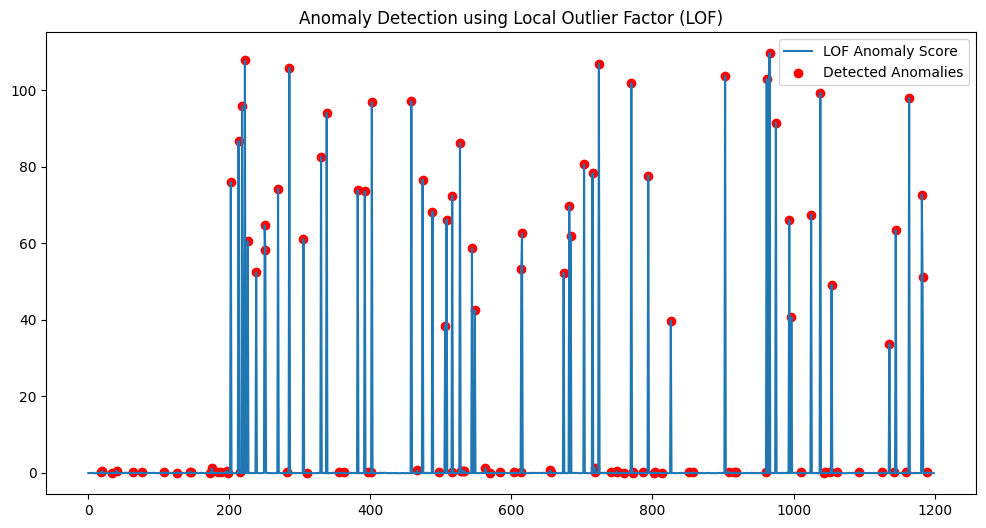

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(anomaly_scores, label="LOF Anomaly Score")
plt.scatter(np.where(anomalies)[0], anomaly_scores[anomalies], color='r', label="Detected Anomalies")
plt.legend()
plt.title("Anomaly Detection using Local Outlier Factor (LOF)")
plt.show()

## Print Number of Detected Anomalies

In [12]:
print(f"Total anomalies detected: {np.sum(anomalies)}")

Total anomalies detected: 115
